<a href="https://colab.research.google.com/github/leandroh00/Projetos/blob/main/Astro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Earthquake Data From 1906-2022
from: https://www.kaggle.com/datasets/garrickhague/world-earthquake-data-from-1906-2022


**Importações:**


In [1]:
import pandas as pd
import seaborn as sns

earthquakeData = pd.read_csv("Global_Earthquake_Data.csv")
earthquakeData.columns = ["DataEHora", "Latitude", "Longitude", "Profundidade", "Magnitude", "MetodoMedicao", "nst","gap",
                             "dmin", "rms", "net", "id", "updated", "place", "Tipo",
                               "horizontalError", "depthError", "magError", "magNst", "status","locationSource", "magSource"]

earthquakeData.head()

,DataEHora,Latitude,Longitude,Profundidade,Magnitude,MetodoMedicao,nst,gap,dmin,rms,...,updated,place,Tipo,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.0,mb,46.0,91.0,1.293,0.80,...,2023-02-27T00:11:38.040Z,"77 km NNW of Aksu, China",earthquake,6.59,1.897,0.078,52.0,reviewed,us,us
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.8,mb,67.0,85.0,5.158,0.95,...,2023-02-26T23:58:32.040Z,"Pagan region, Northern Mariana Islands",earthquake,10.27,7.539,0.043,165.0,reviewed,us,us
2,2023-02-26T21:42:14.541Z,42.0857,79.9516,10.000,4.9,mb,45.0,77.0,1.223,0.82,...,2023-02-27T00:21:32.040Z,NaN,earthquake,6.27,1.869,0.086,42.0,reviewed,us,us
3,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.6,mb,51.0,217.0,5.661,0.57,...,2023-02-26T22:25:29.040Z,northern East Pacific Rise,earthquake,11.79,1.984,0.038,205.0,reviewed,us,us
4,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.5,mb,108.0,62.0,2.866,0.82,...,2023-02-26T19:38:26.040Z,"84 km NE of Otrada, Russia",earthquake,8.66,5.863,0.059,84.0,reviewed,us,us


In [2]:
    #print (earthquakeData.DataEHora.unique() )
    #print (earthquakeData.Latitude.unique() )
    #print (earthquakeData.Longitude.unique() )
print ("Profundidade Média=",earthquakeData.Profundidade.mean() )
#print ("Profundidade Mediana=",earthquakeData.Profundidade.median() )

#earthquakeData.Profundidade.describe()
#earthquakeData.query("place").mean()["Magnitude"]
#profundidade_media = earthquakeData.groupby("Magnitude").mean()["Profundidade"]
#profundidade_media.head()
#sns.boxplot(y=earthquakeData.Profundidade)
#sns.boxplot(x=earthquakeData.Profundidade)
#print ("Magnitude=",earthquakeData.Magnitude.unique() )

#print ("Método=",earthquakeData.MetodoMedicao.unique() )
# print (earthquakeData.nst.unique() )
# print (earthquakeData.gap.unique() )
# print (earthquakeData.dmin.unique() )
# print (earthquakeData.rms.unique() )
# print (earthquakeData.net.unique() )
# print (earthquakeData.id.unique() )
# print (earthquakeData.updated.unique() )
# print (earthquakeData.place.unique() )
# print (earthquakeData.Tipo.unique() )
# print (earthquakeData.horizontalError.unique() )
# print (earthquakeData.depthError.unique() )
# print (earthquakeData.magError.unique() )
# print (earthquakeData.magNst.unique() )
# print (earthquakeData.status.unique() )
# print (earthquakeData.locationSource.unique() )
# print (earthquakeData.magSource.unique() )

Profundidade Média= 69.7951166403061


<ipython-input-3-ee173df481f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(earthquakeData.Profundidade.mean(), bins=50)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: ylabel='Density'>

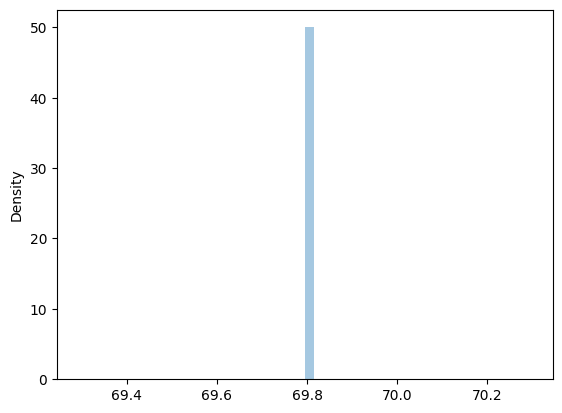

In [3]:
sns.distplot(earthquakeData.Profundidade.mean(), bins=50)

In [4]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.3 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
#!pip install cartopy - este código permitiu a instalção do cartopy
import cartopy.crs as ccrs
from cartopy.feature import LAND, OCEAN, COASTLINE
import ipywidgets as widgets
from IPython.display import display

# Cria uma figura e um eixo
earthquakeData['DataEHora'] = pd.to_datetime(earthquakeData['DataEHora'])

fig = plt.figure(figsize=(10, 6))
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax = plt.axes(projection=ccrs.PlateCarree())
#fundo
#ax.background_img(name='BM', resolution='medium')
ax.add_feature(LAND, facecolor='lightgray')
ax.add_feature(OCEAN, facecolor='lightblue')
ax.add_feature(COASTLINE)

 #contorno
#ax.add_feature(COASTLINE)
#tirar fundo branco
ax.set_facecolor('none')
##

# Função para plotar terremotos para o ano selecionado
def plot_earthquakes(year):
    # Limpa os pontos anteriores
    ax.clear()

    # Adiciona a camada de terra e a camada de oceano
    ax.add_feature(LAND, facecolor='lightgray')
    ax.add_feature(OCEAN, facecolor='lightblue')
    ax.add_feature(COASTLINE)

    # Remove o fundo branco padrão
    ax.set_facecolor('none')

    # Filtra os terremotos para o ano selecionado
    earthquakes_year = earthquakeData[earthquakeData['DataEHora'].dt.year == year]

    # Plota os terremotos como pontos no mapa
    ax.scatter(earthquakes_year['Longitude'], earthquakes_year['Latitude'], color='red', marker='o', transform=ccrs.PlateCarree())
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Terremotos em {}'.format(year))
    plt.show()

# Cria uma barra deslizante para selecionar o ano
year_slider = widgets.IntSlider(min=1906, max=2022, step=1, value=2022, description='Ano:')
widgets.interact(plot_earthquakes, year=year_slider)

interactive(children=(IntSlider(value=2022, description='Ano:', max=2022, min=1906), Output()), _dom_classes=(…

<function __main__.plot_earthquakes(year)>